# Анализ продаж компьютерных игр

**Описание и задачи проекта**

Необходимо проанализировать исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

<br>***Name*** — название игры
<br>***Platform*** — платформа
<br>***Year_of_Release*** — год выпуска
<br>***Genre*** — жанр игры
<br>***NA_sales*** — продажи в Северной Америке (миллионы проданных копий)
<br>***EU_sales*** — продажи в Европе (миллионы проданных копий)
<br>***JP_sales*** — продажи в Японии (миллионы проданных копий)
<br>***Other_sales*** — продажи в других странах (миллионы проданных копий)
<br>***Critic_Score*** — оценка критиков (максимум 100)
<br>***User_Score*** — оценка пользователей (максимум 10)
<br>***Rating — рейтинг*** от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Рейтинг ESRB:

<br>EC - для детей младшего возраста
<br>K-A - от 6 лет
<br>E10+ - от 10 лет и старше
<br>T - подростки от 13 лет
<br>E - для всех
<br>M - для взрослых 17+
<br>AO - только для взрослых 18 лет
<br>PR - рейтинг ожидается

*Данные за 2016 год могут быть неполными.*

## Загрузка данных и изучение общей информации

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import scipy.stats as st
from scipy.stats import levene
from scipy.stats import mannwhitneyu

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 100)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
cm = sns.light_palette("brown", as_cmap=True)

In [2]:
# Чтение файла
df = pd.read_csv('games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()
display(df.sample(10, random_state=1))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,2007.000,Misc,0.000,0.000,0.030,0.000,nan,NaN,NaN
14043,Nobunaga's Ambition II,3DS,2015.000,Strategy,0.000,0.000,0.040,0.000,nan,NaN,NaN
3158,Up,DS,2009.000,Action,0.300,0.270,0.000,0.070,nan,tbd,E
22,Super Mario Bros. 3,NES,1988.000,Platform,9.540,3.440,3.840,0.460,nan,NaN,NaN
110,Mario Kart 8,WiiU,2014.000,Racing,3.150,2.150,1.280,0.510,88.000,9.1,E
1988,ATV: Quad Power Racing,PS,2000.000,Racing,0.580,0.390,0.000,0.070,42.000,tbd,E
7130,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,N64,1997.000,Misc,0.000,0.000,0.220,0.000,nan,NaN,NaN
8849,Derby Stallion 64,N64,2001.000,Sports,0.000,0.000,0.150,0.000,nan,NaN,NaN
14602,Star Wars: The Force Unleashed II,PC,2010.000,Action,0.030,0.000,0.000,0.000,59.000,5.8,T
106,Tekken 3,PS,1998.000,Fighting,3.270,2.220,1.400,0.290,96.000,9.1,T


Есть пропуски в столбцах с наименованием,годом релиза, оценкой критиков, оценкой пользователей, рейтингом. У года релиза тип данных float, в пользовательском рейтинге встречается аббривеатура tbd

In [5]:
# Определение % пропусков
def nancontrol(dataframe):
    nan = pd.DataFrame(round((dataframe.isna().mean()*100),2))
    return nan.style.background_gradient(cmap=cm)
nancontrol(df)

,0
Name,0.01
Platform,0
Year_of_Release,1.61
Genre,0.01
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,51.32
User_Score,40.09


% пропусков в наименовании, годе релиза и жанре - незначителен, можно такие строки удалить.

In [6]:
# Вывод описания колличественных признаков
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000,16715.000,16715.000,16715.000,16715.000,8137.000
mean,2006.485,0.263,0.145,0.078,0.047,68.968
std,5.877,0.814,0.503,0.309,0.187,13.938
min,1980.000,0.000,0.000,0.000,0.000,13.000
25%,2003.000,0.000,0.000,0.000,0.000,60.000
50%,2007.000,0.080,0.020,0.000,0.010,71.000
75%,2010.000,0.240,0.110,0.040,0.030,79.000
max,2016.000,41.360,28.960,10.220,10.570,98.000


In [7]:
# Вывод описания категориальных признаков
df.describe(include=[object])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


Самая большая проблема датасета - большой % пропусков в оценках критиков и пользователей, рейтинге, есть нулевые значения продаж, самая частотная аббривеатура - tbd в пользовательской оценке, сам столбец с пользовательской оценкой в формате object, а оценка кртиков имеет формат float. Назавания столбцов нужно привести к нижнему регистру для удобства анализа.

## Подготовка данных

### Приведение названий столбцов к нижнему регистру

In [8]:
# Нижний регистр для наименований столбцов
df.columns = map(str.lower, df.columns)

In [9]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12576,Disney's Kim Possible: Global Gemini,DS,2007.000,Platform,0.050,0.010,0.000,0.000,70.000,tbd,E
11212,Dynasty Warriors 8: Empires,PS3,2014.000,Action,0.000,0.000,0.090,0.000,nan,tbd,T
9889,Uta no * Prince-Sama: All Star,PSP,2013.000,Action,0.000,0.000,0.120,0.000,nan,NaN,NaN
6811,Corvette,XB,2003.000,Racing,0.180,0.050,0.000,0.010,53.000,8.6,E
4362,Disney Infinity 3.0,PS3,2015.000,Action,0.160,0.210,0.000,0.070,nan,NaN,NaN


### Преобразование типов данных

#### Замена типов данных

In [10]:
data = df.copy()

In [11]:
# Замена типа данных в year_of_release с float на int
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [12]:
# Обработка значения tbd и изменение типа данных в столбце с оценкой пользователя
data['user_score'] = data['user_score'].replace('tbd', 0, regex=True)
data['user_score'] = data['user_score'].astype('float64')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


<br>Замена типа float на int в годе релиза логически вытекает из значений в годах.
<br>Замена типа данных с object на float в столбце с пользовательской оценкой необходима для приведения обоих столбцов с оценками к одному типу, что необходимо для последующего анализа данных. Аббривеатура tbd по открытым источникам расшифровывется в общем смысле как *To Be Determined* или *To Be Decided*. Т.е. в толковании применительно к представленным данным, оценка по играм с таким значением отцуствует либо не определена и будет определена в будущем. Оценка в столбце определена численно, т.е отсуствие оценки возможно заменить на значение 0, как логичное числовое значение отсутствия оценки.

#### Обработка пропусков

In [14]:
# Вывод пропусков в столбце name
data.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.780,0.530,0.000,0.080,nan,nan,NaN
14244,NaN,GEN,1993,NaN,0.000,0.000,0.030,0.000,nan,nan,NaN


In [15]:
# Удаление строк с отсутствием наименования игры
data.dropna(subset=['name'], inplace=True)

Удалены две строки с отсутствием наименования игры. В этих же строках был пропуск жанра.

In [16]:
# Cтроки где есть максимальное число пропусков
data.query(
    'year_of_release != year_of_release and rating != rating and user_score != user_score and critic_score != critic_score'
).sample(10, random_state=1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9738,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,0.000,0.000,0.120,0.000,nan,nan,NaN
10790,Happy Feet Two,X360,NaN,Action,0.080,0.010,0.000,0.010,nan,nan,NaN
6954,Jet X20,PS2,NaN,Racing,0.110,0.090,0.000,0.030,nan,nan,NaN
10258,GiFTPiA,GC,NaN,Role-Playing,0.000,0.000,0.110,0.000,nan,nan,NaN
9151,WCW Backstage Assault,N64,NaN,Action,0.110,0.030,0.000,0.000,nan,nan,NaN
16059,Dance! It's Your Stage,Wii,NaN,Misc,0.000,0.010,0.000,0.000,nan,nan,NaN
13929,Sega Rally 2006,PS2,NaN,Racing,0.000,0.000,0.040,0.000,nan,nan,NaN
15022,Umineko no Naku Koro ni San: Shinjitsu to Gens...,PS3,NaN,Adventure,0.000,0.000,0.020,0.000,nan,nan,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.010,0.000,0.000,0.000,nan,nan,NaN
13647,The History Channel: Great Battles - Medieval,PS3,NaN,Strategy,0.000,0.030,0.000,0.010,nan,nan,NaN


In [17]:
# Удаление строк с одновременными пропусками в годе релиза, оценках критиков и пользователей, рейтинге
data = data.dropna(thresh=8)
len(data.query(
    'year_of_release != year_of_release and rating != rating and user_score != user_score and critic_score != critic_score'))

0

Удалено 85 строк с одновременными пропусками в 4 столбцах, они наименее ценны для анализа, по семплам строк это игры с очень скромными продажами

In [18]:
# Количество пропусков в оценках критиков, пользователей и рейтинге
print('Количество пропусков оценки критиков',(len(data.query('critic_score != critic_score'))))
print('Количество пропусков оценки пользователей',(len(data.query('user_score != user_score'))))
print('Количество пропусков рейтинга',(len(data.query('rating != rating'))))

Количество пропусков оценки критиков 8491
Количество пропусков оценки пользователей 6614
Количество пропусков рейтинга 6679


In [19]:
# сэмплы данных с пропусками
data.query('user_score != user_score and rating != rating and critic_score != critic_score').sample(10,random_state=1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12421,Power Shovel,PS,2000,Action,0.030,0.020,0.000,0.000,nan,nan,NaN
13363,Magic Carpet,PS,1995,Shooter,0.030,0.020,0.000,0.000,nan,nan,NaN
1389,NBA Jam,SNES,1994,Sports,1.190,0.160,0.000,0.030,nan,nan,NaN
13680,Jissen Pachislot Hisshouhou! Hokuto no Ken DS,DS,2005,Misc,0.000,0.000,0.040,0.000,nan,nan,NaN
16034,Enkaku Sousa: Sana e no 23 Hiai,PSP,2009,Adventure,0.000,0.000,0.020,0.000,nan,nan,NaN
1049,Call of Duty: Black Ops 3,X360,2015,Shooter,1.140,0.400,0.000,0.160,nan,nan,NaN
16714,Winning Post 8 2016,PSV,2016,Simulation,0.000,0.000,0.010,0.000,nan,nan,NaN
10184,The Adventures of Jimmy Neutron Boy Genius: Je...,GC,2003,Action,0.090,0.020,0.000,0.000,nan,nan,NaN
3665,Mortal Kombat 3,PS,1995,Fighting,0.290,0.200,0.020,0.040,nan,nan,NaN
12403,Meitantei Conan: Aoki Houseki no Rinbukyoku,DS,2011,Adventure,0.000,0.000,0.060,0.000,nan,nan,NaN


In [20]:
len(data.query('user_score != user_score and rating != rating and critic_score != critic_score'))

6534

В сэмплах данных с пропусками нет определенных закономерностей, разные платформы, разные года релизов. Возможно отметить только невысокие продажи в сэмплах строк, часто только в одном регионе. 6534 строки имеют пропуски в оценках и рейтинге одновременно. Причины пропусков могут быть обусловлены разными факторами. Даты релиза для разных платформ могут быть разные, оценки могут отсутсвовать в агрегаторах в силу года релиза или по другим причинам. Поскольку количество пропусков очень большое, возможно заменить их на технические индикаторы для возможности выделения при анализе: год релиза - на 1900, оценки критиков и пользователей - на 0, т.к. столбцы имеют колличественные данные.

In [21]:
# Заполнение пропусков техническими значениями
data['year_of_release'].fillna(1900, inplace=True)
data['critic_score'].fillna(0, inplace=True)
data['user_score'].fillna(0, inplace=True)

In [22]:
# Проверка уникальных значений в рейтинге
data['rating'].unique().tolist()

['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']

In [23]:
# Замена пропусков в рейтинге на нулевое значение
data['rating'].fillna(0, inplace=True)

Пропуски рейтинга тоже могут иметь разные причины, технические или иные. Так, ESRB - организация присваивающая рейтинги в США с 1994 г, в ЕС есть своя - PEGI с 2003 г, кроме того есть национальные организации. Для целей анализа пропуски в рейтиге заменены на нулевые значения.

In [24]:
# Проверка обработки пропусков
nancontrol(data)

,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,0
user_score,0


#### Добавление столбца с общими продажами

In [25]:
# Добавление столбца с обшими продажами
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.sample(10, random_state=1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14714,Braid,PC,2009,Platform,0.000,0.020,0.000,0.000,90.000,8.600,E10+,0.020
2028,The Lost World: Jurassic Park,PS,1997,Action,0.570,0.390,0.000,0.070,0.000,0.000,0,1.030
14191,Hotel Giant 2,PC,2008,Strategy,0.000,0.030,0.000,0.000,58.000,2.500,E,0.030
1933,Red Dead Redemption: Undead Nightmare,X360,2010,Action,0.570,0.380,0.020,0.100,0.000,7.600,M,1.070
2687,Bayonetta 2,WiiU,2014,Action,0.320,0.280,0.100,0.060,91.000,8.200,M,0.760
3388,Dead Space,PC,2008,Action,0.000,0.530,0.000,0.060,86.000,8.000,M,0.590
1812,Alien: Isolation,PS4,2014,Shooter,0.340,0.570,0.040,0.170,79.000,8.100,M,1.120
1900,Toy Story 3: The Video Game,PS3,2010,Action,0.510,0.400,0.000,0.160,0.000,0.000,0,1.070
8245,Cabela's Legendary Adventures,Wii,2008,Sports,0.160,0.000,0.000,0.010,0.000,0.000,T,0.170
3099,Cartoon Network Block Party / Cartoon Network ...,GBA,2005,Misc,0.470,0.170,0.000,0.010,0.000,0.000,0,0.650


<br>Названия столбцов приведены к нижнему регистру для удобства анализа
<br>При преобработке данных были заменены типы данных в столбце с годом релиза - на целочисленные int, в оценках пользователей - на float. Замены - исходя из логики данных в столбцах.
<br>Удалены 2 строки без наименований игр.
<br>Удалены 85 строк в которых пропущены одновременно год релиза, оценка критиков и пользователей, рейтинг ESRB, как наименее ценные для анализа.
<br>Пропуски в остальных столбцах заменены на технический маркер 0, который позволит выделять такие строки при последующем анализе, оставщиеся пропуски года релиза - на значение 1900.
<br>Замены обусловлены невозможностью точной обработки пропусков и их большой долей в датасете.
<br>Добавлен столбец с общими продажами.

## Исследовательский анализ данных

### Выпуск релизов по годам

In [26]:
# Группировка количества релизов по году
releases_year = data.query('year_of_release != 1900').groupby('year_of_release')['name'].agg(count='count').reset_index()

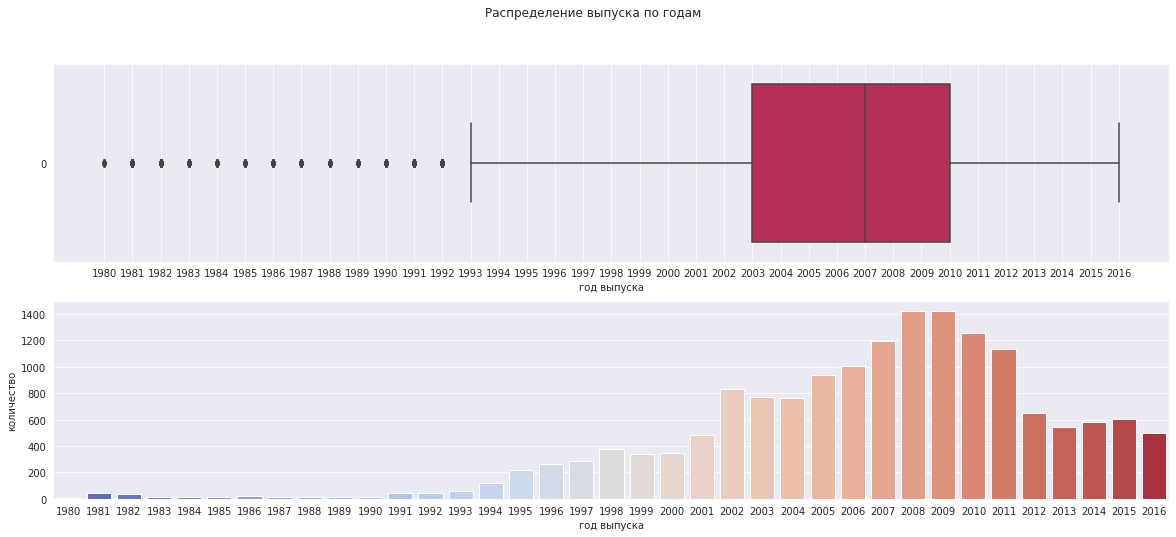

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(20, 8))
fig.suptitle('Распределение выпуска по годам')
sns.boxplot(data=data['year_of_release'][data['year_of_release'] != 1900], palette="rocket_r", orient='h', ax=axes[0])
axes[0].set_xlabel('год выпуска')
axes[0].set_xticks(np.arange(1980,2017,1))
sns.barplot(x='year_of_release', y='count', data=releases_year, palette="coolwarm", ax=axes[1])
axes[1].set_xlabel('год выпуска')
axes[1].set_ylabel('количество')
plt.show()

Динамика увеличения релизов по годам соотносится с развитием технологий компьютерной индустрии, подъем заметен  с середины 90-х, с появлением хорошей графики и интернета. Пик приходится с сердины по конец нулевых, далее с развитием мобильных платформ идет спад в связи с появлением смартфонов и быстрого интернета. На графике заметен весомое увеличение числа релизов с 2002 года, что позволяет считать более ранние релизы наименее ценными для анализа.

### Динамика продаж по платформам

In [28]:
# Расчет общих продаж по платформам
sales_year_platform = data.query('year_of_release != 1900').groupby(
    'platform')['total_sales'].agg(total_sales='sum').sort_values(by='total_sales', ascending=False).reset_index()
sales_year_platform.style.background_gradient(cmap=cm)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


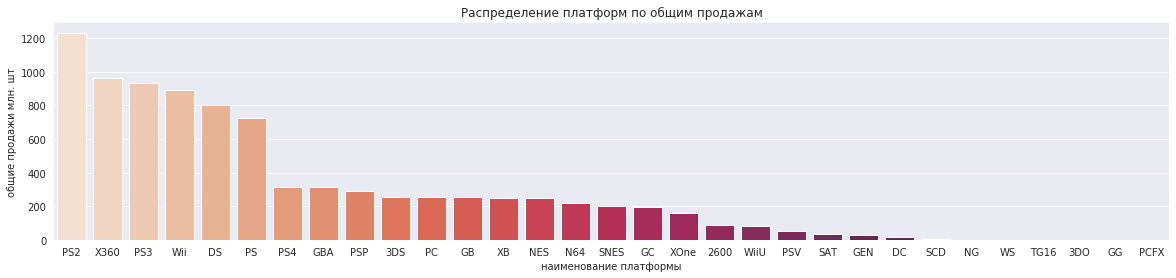

In [29]:
# Построение диаграмы продаж по платформам
fig, axes = plt.subplots(figsize=(20, 4))
sns.barplot(x='platform', y='total_sales', data=sales_year_platform, palette="rocket_r")
plt.title('Распределение платформ по общим продажам')
plt.xlabel('наименование платформы')
plt.ylabel('общие продажи млн. шт')
plt.show()

In [30]:
# Группировка платформ с самыми большими продажами по годам
top_platform = data.query('year_of_release != 1900').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
top_platform = top_platform[['PS2','X360','Wii','PS3','DS','PS']]

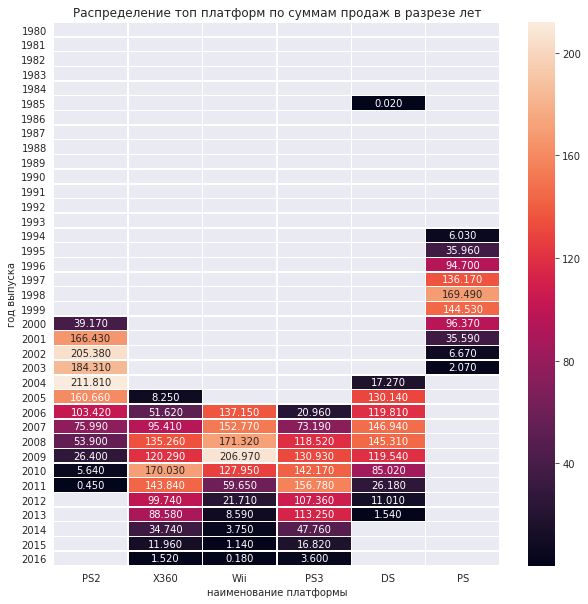

In [31]:
# Диаграмма распределения общих продаж платформ по годам
plt.figure(figsize=(10,10))
sns.heatmap(top_platform, linewidths=.4, annot=True, fmt='2.3f')
plt.title('Распределение топ платформ по суммам продаж в разрезе лет')
plt.xlabel('наименование платформы')
plt.ylabel('год выпуска')
plt.show()

In [32]:
data.query('year_of_release == 1985 and platform == "DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.000,0.000,0.020,0.000,0.000,0.000,0,0.020


In [33]:
data = data.drop(15957, axis='index')

In [34]:
data.query('year_of_release == 1985 and platform == "DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Самая коммерчески успешная платформа - PS, все топ - платформы по продажам, актуальные на момент снятия данных имеют тенденцию к уменьшению общих продаж. На платформе DS есть аномальное значение выпуска в 1985 году, это игра с минимальными продажами. Скорее всего это неправльные данные. Исторически успешные платформы живут около 10 лет, пик продаж смещен ближе к появлению на рынке.

In [35]:
# Группировка значений продаж платформ по годам
platform_life_map = data.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
platform_life_map.fillna(0, inplace=True)

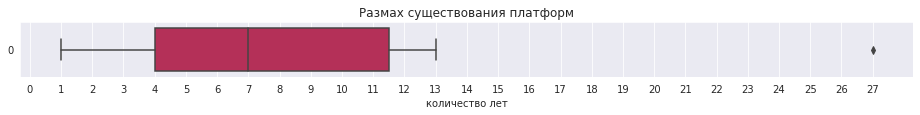

In [36]:
# Сбор значений продаж платформ по годам и построение диаграммы размах существования платформ в годах
platform_life=[]
for platform in platform_life_map.columns:
    platform_life.append(
        platform_life_map[platform].ne(0).value_counts().loc[
            platform_life_map[platform].ne(0).value_counts().index == True].values[0])
fig, ax, = plt.subplots(figsize=(16, 1))   
sns.boxplot(data=platform_life, palette="rocket_r", orient='h')
plt.title('Размах существования платформ')
ax.set_xlabel('количество лет')
ax.set_xticks(np.arange(0,28,1))
plt.show()

In [37]:
# Описание статистики жизни платформ
platform_life_metrics = pd.DataFrame(platform_life, columns=['platform_life_years'])
platform_life_metrics.describe().style.background_gradient(cmap=cm)                                 

,platform_life_years
count,31
mean,8.06452
std,5.34749
min,1
25%,4
50%,7
75%,11.5
max,27


<br>Самые большие исторические продажи у шести платформ: PS2, X360, Wii',PS3, DS, PC
<br>В среднем игровая платформа живет около **8 лет**, половина платформ исторически существуют **от 4 до 11,5 лет**. Платформа PC существует дольше всех в силу успеха Windows, однако продажи довольно равномерные. Платформа Wii от Nintendo наоборот продемонстрировала большой успех в продажах в первый же год.
<br>Все без исключения платформы актуальные на момент снятия данных теряют в продажах с каждым годом, превращаясь в нишевые продукты, из-за конкуренции со смартфонами.

### Актуализация периода продаж и анализ платформ

In [38]:
# Группировка для анализа глобальных продаж по платформам в разрезе года выпуска
all_platform_sales = data.query(
    'year_of_release != 1900').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
all_platform_sales = all_platform_sales[all_platform_sales.index >= 2002]

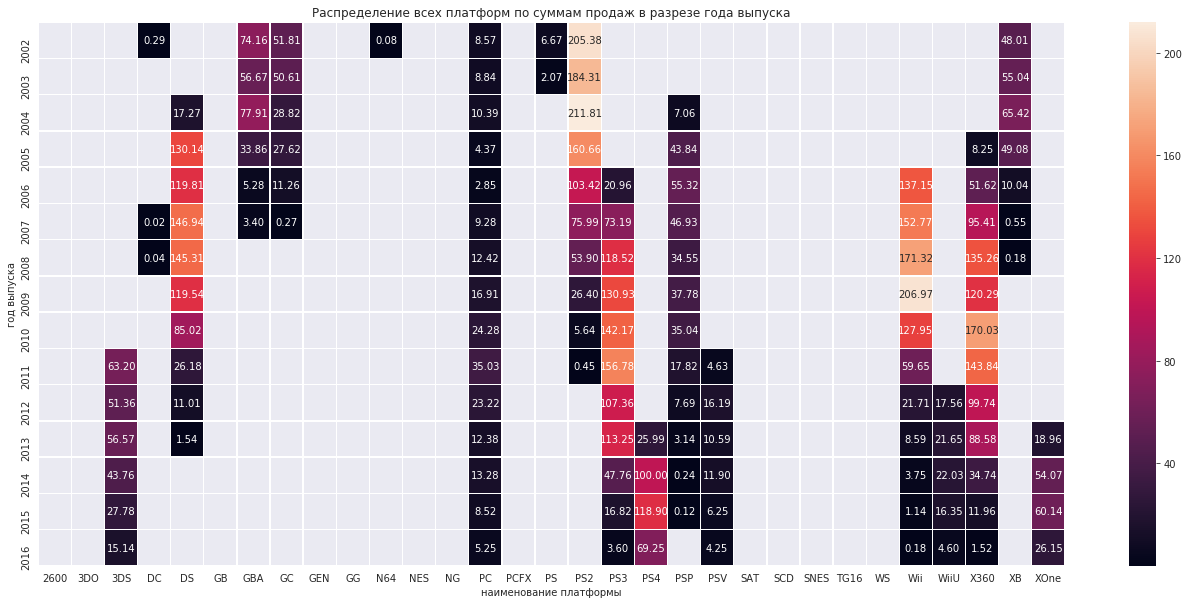

In [39]:
plt.figure(figsize=(23,10))
sns.heatmap(all_platform_sales, linewidths=.4, annot=True, fmt='2.2f')
plt.title('Распределение всех платформ по суммам продаж в разрезе года выпуска')
plt.xlabel('наименование платформы')
plt.ylabel('год выпуска')
plt.show()

<br>Ранее в графике количества релизов по годам был выявлен скачок с 2002 года. На момент снятия датасета - конец 2016 года, видно из графика выше, что существующие платформы ограничены девятью (3DS, PC, PS3, PS4, PSV, Wii, WiiU, X360, XOne).

<br>Среднее время существования платформы из предидущего исследования около 8 лет, медианное - 7 лет. Исходя из этих данных возможно рассмотреть **актуальный период** с 2013 по 2016 неполный год.

Из существующих на конец 2016 года платформ:
<br>*Платформа 3DS* - прошла пик продаж в 2013, продажи устойчиво снижаются, возраст - почти 7 лет
<br>*Платформа PC* - прошла пик продаж в 2011, снижение продаж с 2015, значение возраста малоценно
<br>*Платформа PS3* - прошла пик продаж в 2011, устойчивое снижение продаж с 2014, возраст почти 11 лет
<br>*Платформа PS4* - можно сказать на пике по 2015 году, хотя тенденция в 2016 - на снижение, возраст почти 4 года
<br>*Платформа PSV* - последний всплеск продаж в 2014, в 2015 двухкратное падение в 2015, возраст почти 6 лет
<br>*Платформа Wii* - пик в 2009, далее снижение каждый год, возраст почти 12 лет
<br>*Платформа WiiU* - на пике в 2014, в 2015 - снижение на четверть, возраст почти 5 лет
<br>*Платформа X360* - пик 2010, далее устойчивое снижение, возраст почти 12 лет.
<br>*Платформа XOne* - пик в 2015 году, возраст почти 4 года

<br>Очевидно что PS3, Wii и X360 можно исключить из списка перспективных в связи с наличием более поздних и современных моделей линейки PS4, WiiU и XOne.

In [40]:
# Подготовка данных для продаж по платформам за актуальный период
data_temp = data.copy()
mylist = ['3DS','WiiU','PC', 'PSV', 'PS4', 'XOne']
actual_data = data_temp.query('year_of_release >= 2012 and year_of_release < 2016 and platform in @mylist')
actual_platform = actual_data.groupby(['year_of_release', 'platform'])['total_sales'].agg('sum')
actual_platform = actual_platform.reset_index()
actual_platform = pd.DataFrame(actual_platform)
actual_platform.groupby('platform')['total_sales'].agg('sum')

platform
3DS    179.470
PC      57.400
PS4    244.890
PSV     44.930
WiiU    77.590
XOne   133.170
Name: total_sales, dtype: float64

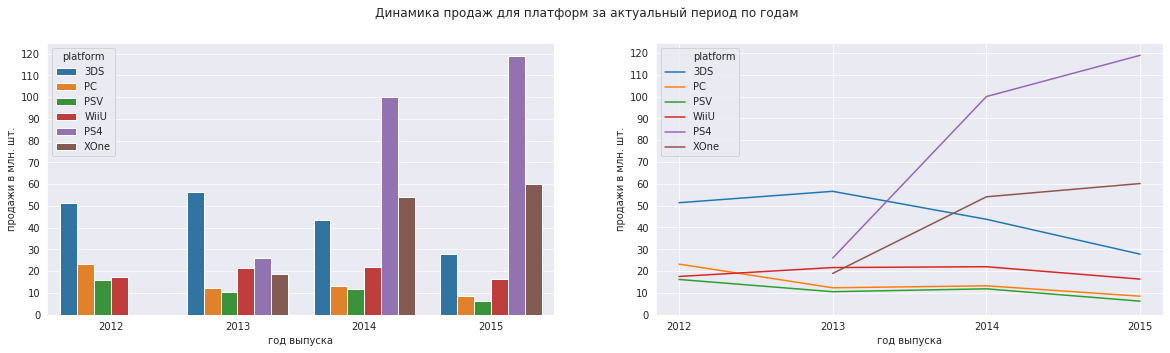

In [41]:
# Графики для продаж платформ по годам за актуальный период
fig, axes = plt.subplots(1,2,figsize=(20,5))
fig.suptitle('Динамика продаж для платформ за актуальный период по годам')
sns.barplot(y='total_sales', x='year_of_release', hue='platform', data=actual_platform, ax=axes[0])
axes[0].set_xlabel('год выпуска')
axes[0].set_ylabel('продажи в млн. шт.')
axes[0].set_yticks(np.arange(0,130,10))
sns.lineplot(y='total_sales', x='year_of_release', hue='platform', data=actual_platform, ax=axes[1])
axes[1].set_xlabel('год выпуска')
axes[1].set_ylabel('продажи в млн. шт.')
axes[1].set_xticks(np.arange(2012,2016,1))
axes[1].set_yticks(np.arange(0,130,10))
plt.show()

Из графиков выше можно сделать вывод:

Платформы которые находятся на пике продаж или близко от него, это PS4 от Sony и XOne от Microsoft, обе платформы 8 поколения увидели свет в 2013 году, являются лидерами по глобальным продажам последних лет. Получив почти равные продажи в стартовом году, далее PS4 уверенно опережает XOne почти двойными темпами 244 млн против 133 в продажах с 2013.

Платформа 3DS (179  млн. в актуально периоде) формально вторая после PS4, ее вряд ли можно отнести к перспективным, как мобильная платформа она испытывает сильную конкуренцию со смартфонами, но ее до сих пор любят пользователи японского рынка. 

Компания Nintendo очевидно сдает рыночные позиции со своей WiiU, которая всего на год старше лидеров, но продажи за актуальный период меньше своей же мобильной 3DS.

Платформа Sony - PSV, также из мобильной линейки, обеспечила продаж за актуальный период меньше всех, почти в пять раз меньше чем конкурирующая мобильная 3DS Nintendo. C развитем конкуренции со смартфонами не имеет шансов.

Платформа PC - долгожитель рынка в силу доминирующего положения Microsoft, самые маленькие но стабильные продажи игр для нее среди стационарных конкурентов, занимает особенную нишу, в ней и остантся, вряд ли ее можно отнести к перспективной.

Резюме: **Самые перспективные платформы на момент снятия данных - PS4 И XOne.**

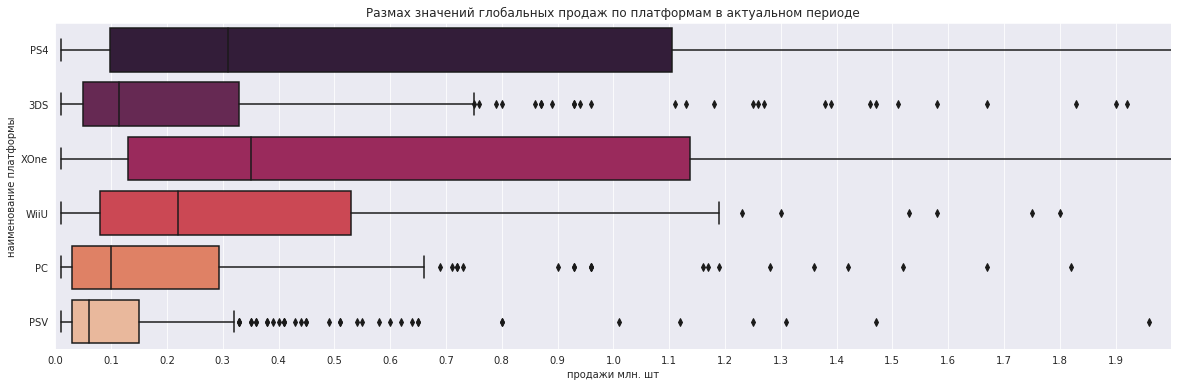

In [42]:
# Диаграмма размах по глобальным продажам в разрезе платформ
fig, ax = plt.subplots(figsize=(20,6))
sns.boxplot(y="platform", x='total_sales', data=actual_data, orient='h', palette='rocket')
ax.set_xticks(np.arange(0,2,0.1))
plt.title('Размах значений глобальных продаж по платформам в актуальном периоде')
ax.set_xlabel('продажи млн. шт')
ax.set_ylabel('наименование платформы')
ax.set_xlim(0, 2)
plt.show()

<br>График размаха глобальных продаж отдельных игр подтверждает выводы сделанные выше. 50% игр для PS4 и XOne продавали от 50 до чуть более 600 тыс., в актуальном периоде. Но для обих этих платформ игры нередко также показывают очень большой коммерческий успех, среди них много бестселлеров. Более низкая чем у XOne медиана у PS4, говорит разброс в продажах у PS4 самый большой.
<br>Половина игр для WiiU имели продажи от 60 до 550 тыс., но количество успехов в разы ниже чем У PS4 и XOne.
<br>Лишь четвертая часть игр для PC продавала более 200 тыс. шт., но коммерческие успехи также случались.
<br>95% игр для мобильной 3DS продали более 570 тыс. шт. против 210 тыс. у конкурирующей PSV.
<br>75% игр для PSV не приносили в продавали более 100 тыс. шт.

In [43]:
# Сравнение количества релизов по годам для PS4 и XOne
actual_data.query(
    'platform == "PS4" or platform == "XOne"').groupby(
    ['year_of_release', 'platform']
    )['name'].agg(count='count').style.background_gradient(cmap=cm)

<br>Несмотря на то что по общим продажам игр PS4 почти в два раза превышает конкурента XOne, в разрезе продаж по играм отличия не столь значимые. Причина разницы в глобальных продажах - для PS4 c 2014 года выпускают значительно **больше игр** чем для XOne.

### Влияние отзывов критиков и пользователей на продажи по платформе

In [44]:
ps4 = actual_data.query('platform == "PS4" and (user_score != 0) and (critic_score != 0)')
print('Количество игр с оценками за актуальный период для PS4',len(ps4))

Количество игр с оценками за актуальный период для PS4 153


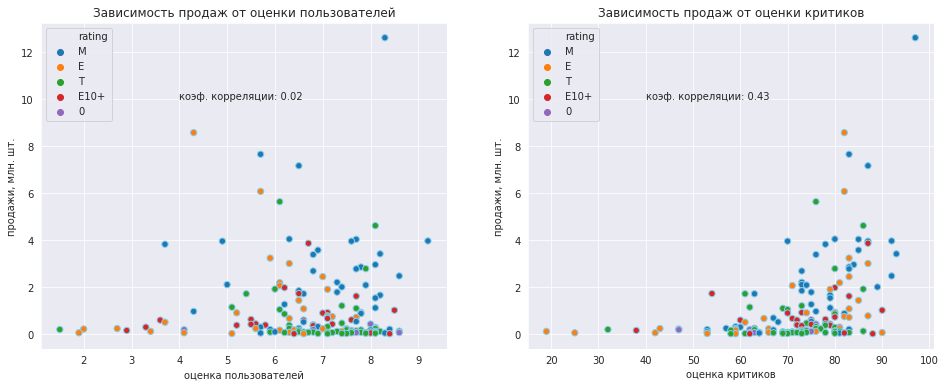

In [45]:
# Диаграммы рассеяния зависимости продаж от оценок
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(ax=ax[0], data=ps4, x='user_score', y='total_sales', s=40, color='m', edgecolor="skyblue", linewidth=1, hue='rating')
ax[0].set_title('Зависимость продаж от оценки пользователей')
ax[0].set_ylabel('продажи, млн. шт.')
ax[0].set_xlabel('оценка пользователей')
ax[0].text(4, 10, 
         'коэф. корреляции: ' + str(round(ps4['user_score'].corr(ps4['total_sales']), 2)))
sns.scatterplot(ax=ax[1], data=ps4, x='critic_score', y='total_sales', s=40, color='g', edgecolor="skyblue", linewidth=1, hue='rating')
ax[1].set_title('Зависимость продаж от оценки критиков')
ax[1].set_ylabel('продажи, млн. шт.')
ax[1].set_xlabel('оценка критиков')
ax[1].text(40, 10, 
         'коэф. корреляции: ' + str(round(ps4['critic_score'].corr(ps4['total_sales']), 2)))
plt.show()

На продажи игр для самой перспективной топовой платформы PS4 отзывы пользователей не влияют, влияние отзывов критиков умеренное

In [46]:
# Срез по платформам
xone = actual_data.query('platform == "XOne" and (user_score != 0) and (critic_score != 0)')
wiiu = actual_data.query('platform == "WiiU" and (user_score != 0) and (critic_score != 0)')
freeds = actual_data.query('platform == "3DS" and (user_score != 0) and (critic_score != 0)')
psv = actual_data.query('platform == "PSV" and (user_score != 0) and (critic_score != 0)')
pc = actual_data.query('platform == "PC" and (user_score != 0) and (critic_score != 0)')

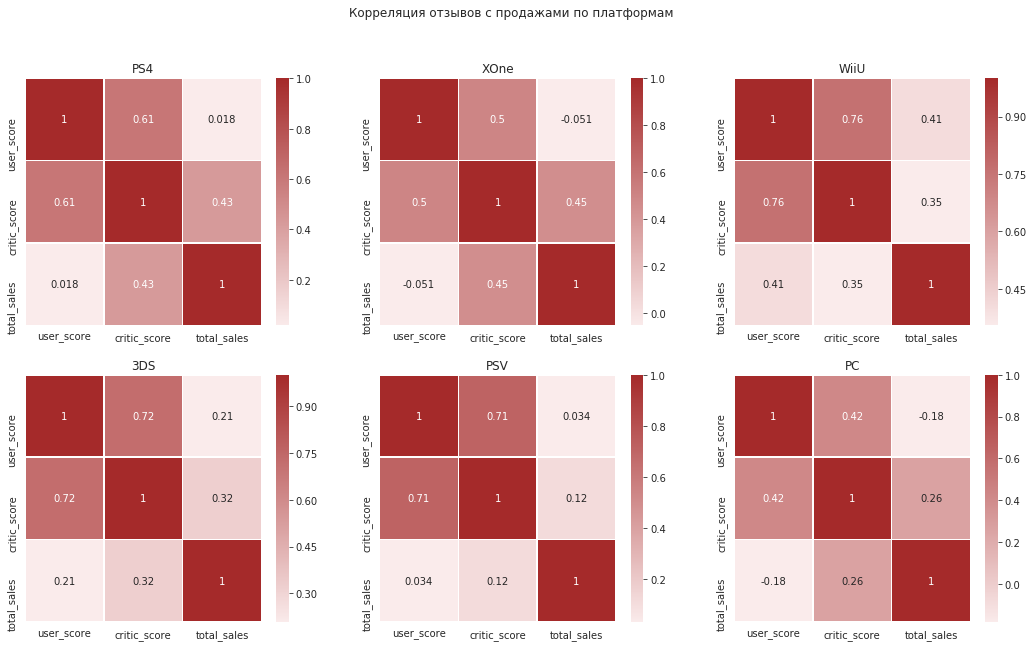

In [47]:
# Корреляционна матрица по всем актуальным платформам
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle( "Корреляция отзывов с продажами по платформам" )
#plt.yticks(va="center")
sns.heatmap(
    ax=ax[0,0], data=ps4[
        ['user_score', 'critic_score', 'total_sales']].corr(), linewidth = 0.5 , cmap = cm, annot=True, linewidths=.5)
ax[0,0].set_title('PS4')
sns.heatmap(
    ax=ax[0,1], data=xone[
        ['user_score', 'critic_score', 'total_sales']].corr(), linewidth = 0.5 , cmap = cm, annot=True, linewidths=.5)
ax[0,1].set_title('XOne')
sns.heatmap(
    ax=ax[0,2], data=wiiu[
        ['user_score', 'critic_score', 'total_sales']].corr(), linewidth = 0.5 , cmap = cm, annot=True, linewidths=.5)
ax[0,2].set_title('WiiU')
sns.heatmap(
    ax=ax[1,0], data=freeds[
        ['user_score', 'critic_score', 'total_sales']].corr(), linewidth = 0.5 , cmap = cm, annot=True, linewidths=.5)
ax[1,0].set_title('3DS')
sns.heatmap(
    ax=ax[1,1], data=psv[
        ['user_score', 'critic_score', 'total_sales']].corr(), linewidth = 0.5 , cmap = cm, annot=True, linewidths=.5)
ax[1,1].set_title('PSV')
sns.heatmap(
    ax=ax[1,2], data=pc[
        ['user_score', 'critic_score', 'total_sales']].corr(), linewidth = 0.5 , cmap = cm, annot=True, linewidths=.5)
ax[1,2].set_title('PC')
plt.show()

<br>Топовые новейшие платформы PS4 и XOne, как и WiiU имеют умеренную связь между отзывами критиков и продажами, связь продаж с пользовательскими оценками отсутствует.
<br>Мобильные платформы 3DS имеет слабую связь между отзывами как критиков так и пользователей и продажами.
<br>Платформа PSV в практически не имеет взаимосвязи между продажами и отзывами.

### Распределение игр по жанрам

In [48]:
# Группировка продаж по жанрам
genre_sales = actual_data.groupby(
    'genre')['total_sales'].agg(mean_sales='mean', median_sales='median', qty='count', total_sales='sum')
genre_sales.sort_values('total_sales', ascending=False).reset_index().style.background_gradient(cmap=cm)

,genre,mean_sales,median_sales,qty,total_sales
0,Action,0.399237,0.125,498,198.82
1,Shooter,1.46681,0.63,91,133.48
2,Role-Playing,0.608967,0.16,213,129.71
3,Sports,0.694444,0.23,108,75
4,Platform,0.953725,0.31,51,48.64
5,Misc,0.384952,0.18,105,40.42
6,Racing,0.640208,0.245,48,30.73
7,Simulation,0.754615,0.16,39,29.43
8,Fighting,0.567619,0.125,42,23.84
9,Adventure,0.108507,0.04,134,14.54


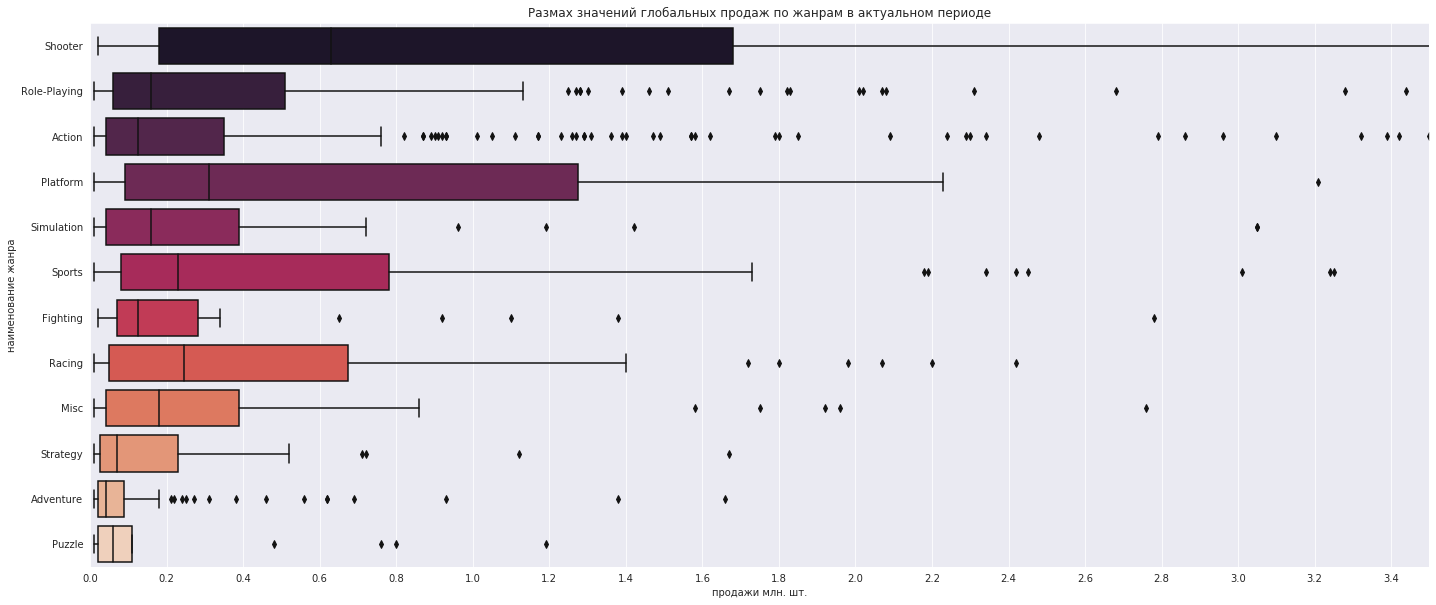

In [49]:
# Диаграмма размах по глобальным продажам в разрезе жанра
fig, ax = plt.subplots(figsize=(24,10))
sns.boxplot(y='genre', x='total_sales', data=actual_data, orient='h', palette='rocket')
ax.set_xticks(np.arange(0,3.5,0.2))
plt.title('Размах значений глобальных продаж по жанрам в актуальном периоде')
ax.set_xlabel('продажи млн. шт.')
ax.set_ylabel('наименование жанра')
ax.set_xlim(0, 3.5)
plt.show()

In [50]:
# Жанры ТОП 10 игр по продажам
actual_data.groupby(
    ['name','genre'])['total_sales'].agg(total_sales='sum').nlargest(
    10, 'total_sales').reset_index().style.background_gradient(cmap=cm)

,name,genre,total_sales
0,Call of Duty: Black Ops 3,Shooter,22.28
1,Grand Theft Auto V,Action,19.26
2,Pokemon X/Pokemon Y,Role-Playing,14.6
3,Call of Duty: Advanced Warfare,Shooter,13.33
4,Fallout 4,Role-Playing,12.67
5,Super Smash Bros. for Wii U and 3DS,Fighting,12.42
6,Star Wars Battlefront (2015),Shooter,12.19
7,FIFA 16,Sports,12.03
8,Pokemon Omega Ruby/Pokemon Alpha Sapphire,Role-Playing,11.68
9,New Super Mario Bros. 2,Platform,9.9


<br>По штучным продажам лидирует жанр Action, поскольку этот жанр имеют максимальное количество релизов, хотя большинство инр весьма ординарны. 
<br>Второй по продажам жанр Shooter, отстает от лидера на более чем на 60 млн., но медианное количество игр этого жанра более чем в четыре с половиной раза больше чем у Action - в среднем шутеры продаются лучше всех, но по количеству релизов отстают от лидера более чем в два раза и поэтому на втором месте.
<br>В ТОП 10 штучных породаж по играм за актуальный период попали 3 шутера, столько же ролевых игр и только 1 экшен. Но количество релизов решает.
<br>Cамые не популярные игры за последние годы Strategy и Puzzle.
<br>**Самый популярный по суммам штучных продаж и релизам - жанр Action**

<br>**Краткие итоги исследовательского анализа:**

<br>1. Исторически половина релизов игр пришлась на период **с 2003 по 2010 годы**, в 2008 и в 2009 выходило по 1400 игр в год, далее с 2012 года эта цифра колеблется около 600 релизов в год.
<br>2. Самые исторически коммерчески успешные платформы **PS2, X360 и Wii**, выход которых совпал с "золотым веком" в индустрии.
<br>3. В среднем исторический срок существования платформ - **8 лет**. Технологии не стоят на месте.
<br>4. На момент среза данных, актуальным периодом для анализа можно считать **2012, 2013, 2014, 2015 годы**. 2016 год возможно исключить из анализа поскольку данные за этот год не полные. Из 9 существующих на момент снятия данных платформ, самыми перспективными можно считать **PS4 и XOne**, остальные - либо ранни версии, либо нишевые истории как PC, либо проигрывающие смартфонам мобильные платформы.
<br>5. Разброс продаж у PS4 И XOne примерно одинаковый, но под PS4 особенно с 2015 года **больше релизов**.
<br>6. **Отзывы критиков имеют умеренно слабую взаимосвязь с продажами** у PS4 и XOne, отзывы пользователей практически не влияют на продажи в целом по эти платформам. У остальных платформ связь продаж с оценками и критиков и пользователей очень слабая.
<br>7. Больше всех зарабатывают - **Action и Shooter**, шутеры в среднем намного больше продаются, размах продажв шт. у них самый большой, у экшенов в разы больше релизов и первое место в продажах. В топе продаж по играм - 3 шутера и только один экшен.

## Портрет пользователя по регионам

In [51]:
# Группировка данных ТОП5 платформ по продажам в разрезе рынков
na_platform = actual_data.groupby('platform')['na_sales'].agg(na_sales='sum').nlargest(5, 'na_sales').reset_index()
eu_platform = actual_data.groupby('platform')['eu_sales'].agg(eu_sales='sum').nlargest(5, 'eu_sales').reset_index()
jp_platform = actual_data.groupby('platform')['jp_sales'].agg(jp_sales='sum').nlargest(5, 'jp_sales').reset_index()

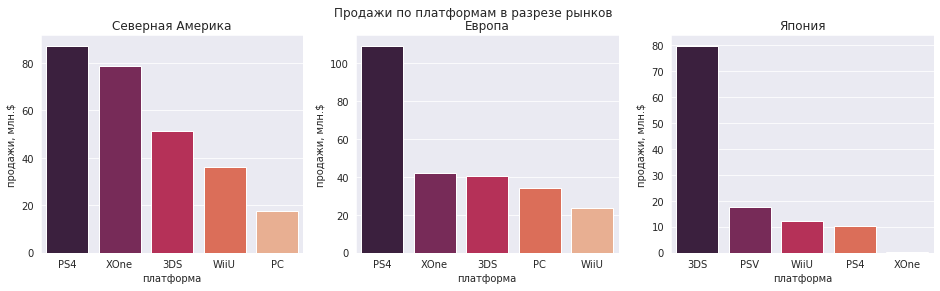

In [52]:
# График продаж по платформам в разрезе рынков
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Продажи по платформам в разрезе рынков')
sns.barplot(y='na_sales', x='platform', data=na_platform, ax=ax[0], palette='rocket')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('продажи, млн.$')
ax[0].set_xlabel('платформа')
sns.barplot(y='eu_sales', x='platform', data=eu_platform, ax=ax[1], palette='rocket')
ax[1].set_title('Европа')
ax[1].set_ylabel('продажи, млн.$')
ax[1].set_xlabel('платформа')
sns.barplot(y='jp_sales', x='platform', data=jp_platform, ax=ax[2], palette='rocket')
ax[2].set_title('Япония')
ax[2].set_ylabel('продажи, млн.$')
ax[2].set_xlabel('платформа')
plt.show()

In [53]:
# Вывод сумм продаж и долей ТОП5 платформ по рынкам
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = actual_data.pivot_table(index='platform', values=column, aggfunc='sum').sort_values(column, ascending=False)
    region['share'] = region[column] / region[column].sum()
    display(region.nlargest(5, column).style.background_gradient(cmap=cm).format("{:.2f}"))

,na_sales,share
platform,,
PS4,87.25,0.31
XOne,78.85,0.28
3DS,51.17,0.18
WiiU,36.00,0.13
PC,17.76,0.06


,eu_sales,share
platform,,
PS4,109.31,0.42
XOne,41.96,0.16
3DS,40.31,0.15
PC,34.23,0.13
WiiU,23.65,0.09


,jp_sales,share
platform,,
3DS,79.76,0.66
PSV,17.48,0.15
WiiU,12.34,0.10
PS4,10.22,0.09
XOne,0.33,0.00


В Северной Америке и в Европе лидер - PS4, а в Японии - мобильный 3DS, Япония - последний оплот компании Nintendo, 3DS и WiiU в сумме занимают 76% местного рынка. XOne от Microsoft второй в Северной Америке, в Японии его доля - статистическая погрешность. В Европе кроме лидирущего с большим отрывом PS4 остальные платформы показывают почти одинаковые цифры.

In [54]:
# Группировка данных ТОП5 жанров по продажам в разрезе рынков
na_genres = actual_data.groupby('genre')['na_sales'].agg(na_sales='sum').nlargest(5, 'na_sales').reset_index()
eu_genres = actual_data.groupby('genre')['eu_sales'].agg(eu_sales='sum').nlargest(5, 'eu_sales').reset_index()
jp_genres = actual_data.groupby('genre')['jp_sales'].agg(jp_sales='sum').nlargest(5, 'jp_sales').reset_index()

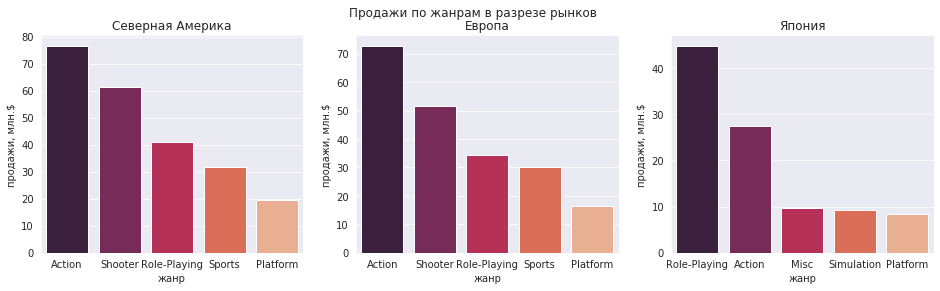

In [55]:
# График продаж по жанрам в разрезе рынков
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Продажи по жанрам в разрезе рынков')
sns.barplot(y='na_sales', x='genre', data=na_genres, ax=ax[0], palette='rocket')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('продажи, млн.$')
ax[0].set_xlabel('жанр')
sns.barplot(y='eu_sales', x='genre', data=eu_genres, ax=ax[1], palette='rocket')
ax[1].set_title('Европа')
ax[1].set_ylabel('продажи, млн.$')
ax[1].set_xlabel('жанр')
sns.barplot(y='jp_sales', x='genre', data=jp_genres, ax=ax[2], palette='rocket')
ax[2].set_title('Япония')
ax[2].set_ylabel('продажи, млн.$')
ax[2].set_xlabel('жанр')
plt.show()

In [56]:
# Вывод сумм продаж и долей ТОП5 жанров по рынкам
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = actual_data.pivot_table(index='genre', values=column, aggfunc='sum').sort_values(column, ascending=False)
    region['share'] = region[column] / region[column].sum()
    display(region.nlargest(5, column).style.background_gradient(cmap=cm).format("{:.2f}"))

,na_sales,share
genre,,
Action,76.67,0.27
Shooter,61.55,0.22
Role-Playing,41.05,0.15
Sports,31.77,0.11
Platform,19.59,0.07


,eu_sales,share
genre,,
Action,72.79,0.28
Shooter,51.75,0.20
Role-Playing,34.21,0.13
Sports,30.28,0.12
Platform,16.54,0.06


,jp_sales,share
genre,,
Role-Playing,44.87,0.37
Action,27.49,0.23
Misc,9.66,0.08
Simulation,9.28,0.08
Platform,8.44,0.07


В Северной Америке и в Европе больше всего продаются экшены, затем шутеры, потом ролевые игры. В Японии совершенно другой лидер - жанр ролевых игр, экшены идут с большим отрывом вторыми, а вот шутеры даже не попадают в ТОП5

### Влияние рейтинга ESRB на продажи по регионам

**Рейтинг ESRB:**

<br>**EC** - для детей младшего возраста
<br>**K-A** - от 6 лет
<br>**E10+** - от 10 лет и старше
<br>**T** - подростки от 13 лет
<br>**E** - для всех
<br>**M** - для взрослых 17+
<br>**AO** - только для взрослых 18 лет
<br>**PR** - рейтинг ожидается

In [57]:
# Группировка данных ТОП5 жанров по рейтинге в разрезе рынков
na_rating = actual_data.groupby('rating')['na_sales'].agg(na_sales='sum').reset_index()
eu_rating = actual_data.groupby('rating')['eu_sales'].agg(eu_sales='sum').reset_index()
jp_rating = actual_data.groupby('rating')['jp_sales'].agg(jp_sales='sum').reset_index()


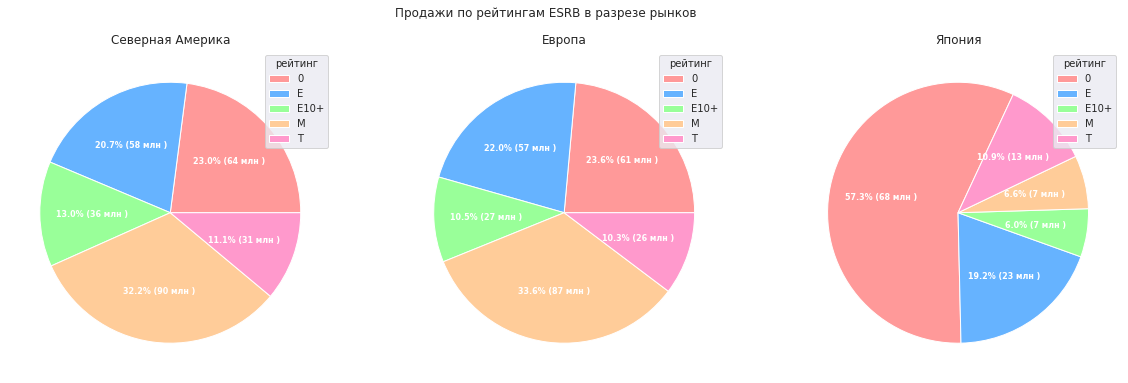

In [58]:
# Диаграмма продаж по рейтингам в разрезе рынков

fig, ax = plt.subplots(1,3, figsize=(20, 6))
fig.suptitle('Продажи по рейтингам ESRB в разрезе рынков')
data1, categories1 = na_rating['na_sales'], na_rating['rating']
data2, categories2 = eu_rating['eu_sales'], eu_rating['rating']
data3, categories3 = jp_rating['jp_sales'], jp_rating['rating']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ff99cc']
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} млн )".format(pct, absolute)
wedges, texts, autotexts = ax[0].pie(data1 ,autopct=lambda pct: func(pct, data1), textprops=dict(color="w"), colors=colors)
ax[0].set_title("Северная Америка")
ax[0].legend(wedges, categories1, title="рейтинг", loc="upper right")
plt.setp(autotexts, size=8, weight=850)
wedges, texts, autotexts = ax[1].pie(data2 ,autopct=lambda pct: func(pct, data2), textprops=dict(color="w"),colors=colors)
ax[1].set_title("Европа")
ax[1].legend(wedges, categories2, title="рейтинг", loc="upper right")
plt.setp(autotexts, size=8, weight=850)
wedges, texts, autotexts = ax[2].pie(
    data3 ,autopct=lambda pct: func(pct, data3), startangle = 65, textprops=dict(color="w"),colors=colors)
ax[2].set_title("Япония")
ax[2].legend(wedges, categories3, title="рейтинг", loc="upper right")
plt.setp(autotexts, size=8, weight=850)
plt.show()    

<br>В Северной Америке и в Европе схожая картина продаж по рейтингу - треть игр имеют рейтинг "17+", пятая часть - рейтинг "для всех", четверть - "подростковые" рейтинги, у примерно четверти игр рейтинг отсутствует.
<br>В Японии рейтинг отсутствует более чем у половины игр, пятая часть имеет рейтинг "для всех", четверть - все остальные.

<br>Большое количество отсутствия рейтингов в Японии возможно объяснить наличием национальной рейтинговой организации, что справедливо и для Европы, где есть как общие так и национальные организации. Онлайн магазины тип Stream вообще могут не получать рейтинги, или пользоватся международной IARC для полностью цифровых продаж.

**Портрет пользователя определенного рынка:**

Пользователь из Северной Америки любит и покупает экшены в пяти случаях из ста, чуть меньше - шутеры. В основном у него игры с рейтингом "для всех" или "17+" В 50% случаях, для своей Play Station 4, немного меньше вероятность что у него XOne от Microsoft. Возможно довольно часто покупает игры онлайн, иначе сложно объяснить что в стране придумавшей рейтинги для игр, их нет у четверти релизов.

Пользователь из Европы однозначно почти в половине случаев выбирает игры для Play Station 4, XOne у него окажется с такой же вероятностью что и игровой ноутбук или мобильная 3DS - в 13-16 случаях из ста. В остальном его предпочтения такие же как у пользователя из Северной Америки - больше всего любит экшены, затем шутеры, в половине случаев с рейтингом " для всех" или "17+", цифровые покупки вероятны также как и в Америке.

Пользователи из Японии уникальны, как и их страна. Они не замечают и не притрагиваются к XOne от Microsoft, Свежий PS4 У японца можно встретиь в десяти случаях из ста. В отличии от старого доброго 3DS от Nintendo, игры для которой забирают 66% продаж в индустрии в последние годы. Японец не любит стрелялки-шутеры, они его почти не интересуют, зато ролевые игры у него на первом месте в 37 случаях из ста, единственное что роднит его в предпочтениях с американцем и европейцем - популяность жанра экшен - 25% от всех продаж. Значению рейтинга американской ESRB его заботит мало, его нет у более чем половины игр покупаемых в Японии. Свои приставки, свои игры и скорее всего свои рейтинги или онлайн покупки, японцы действительно отличаются от других игроманов. 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC

<br>**Первая гипотеза представленная для проверки - cредние пользовательские рейтинги платформ Xbox One и PC равны**

<br>Следовательно гипотезы можно сформулировать:

<br>**$Ho$**  - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
<br>**$H1$**  - cредние пользовательские рейтинги платформ Xbox One и PC различаются

In [59]:
# Формирование выборок
xone_user_score = actual_data.query('platform == "XOne" and user_score != 0')['user_score']
pc_user_score = actual_data.query('platform == "PC" and user_score != 0')['user_score']
print('Размер выборки XOne:',len(xone_user_score))
print('Размер выборки PC:',len(pc_user_score))

Размер выборки XOne: 116
Размер выборки PC: 161


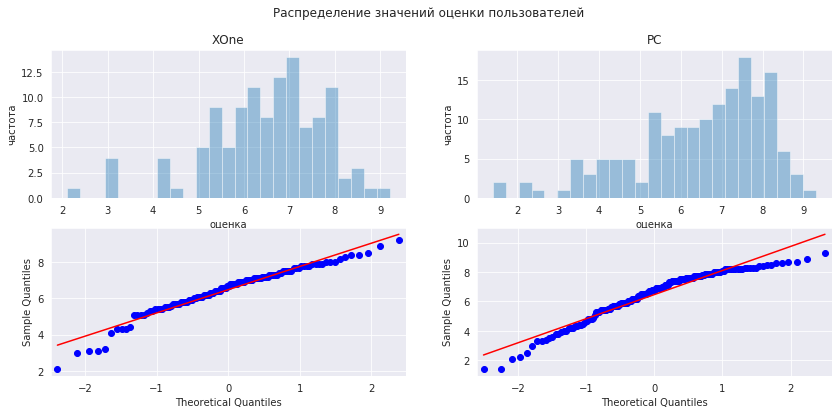

In [60]:
# Визуальная оценка распределения признаков в выборках
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
fig.suptitle('Распределение значений оценки пользователей')
sns.set_palette("rocket_r", 2, .85  ,color_codes=True)
sns.distplot(xone_user_score, ax=axes[0,0], kde=False, bins=25)
axes[0,0].set_title('XOne')
axes[0,0].set_xlabel('оценка')
axes[0,0].set_ylabel('частота')
sns.distplot(pc_user_score, ax=axes[0,1], kde=False, bins=25)
axes[0,1].set_title('PC')
axes[0,1].set_xlabel('оценка')
axes[0,1].set_ylabel('частота')
qqplot(xone_user_score, line='s', ax=axes[1,0])
qqplot(pc_user_score, line='s', ax=axes[1,1])
plt.show()

Выборки для проверки гиротезы были очищены от нулевых значений - замен пропусков, визуально, распределение можно считать условно нормальным, отклонения можно объяснить не очень большой выборкой 116 и 161 наблюдений

In [61]:
# Расчет дисперсий
print('Дисперсия выборки отзывов для XOne:', xone_user_score.var(ddof=1))
print('Дисперсия выборки отзывов для PC:', pc_user_score.var(ddof=1))

Дисперсия выборки отзывов для XOne: 1.6594932533733138
Дисперсия выборки отзывов для PC: 2.710907608695652


Визуально дисперсии не равны, но можно применить критерий Левена для статистической оценки равенства дисперсий

<br>**$Ho$**  - ***дисперсии в выборках пользовательских рейтингов платформ Xbox One и PC одинаковые***
<br>**$H1$**  - ***дисперсиив в выборках пользовательскиих рейтингов платформ Xbox One и PC различаются***

In [62]:
# Тест Левене
alpha=0.05
results2 =levene(xone_user_score, pc_user_score)
print('p-value:', results2.pvalue)

if (results2.pvalue < alpha):
    print("Необходимо отвергнуть нулевую гипотезу")
else:
    print("Не нужно отвергать нулевую гипотезу")

p-value: 0.007378897272236593
Необходимо отвергнуть нулевую гипотезу


Тест Левне говорит что между дисперсиями выборок есть статистически значимые различия, поэтому можно отвергуть гипотезу о их равенстве, т.к. вероятность случайного происхождения выборок из генеральной совокупности с равными дисперсиями - 0.7%, соответственно для оценки средних выборок нужен t-критерий для независимых выборок с разными дисперсиями

In [63]:
# Проведение t теста для выборок с разной дисперсией
alpha=0.05
results1 = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False) 
print('p-value:', results1.pvalue)

if (results1.pvalue < alpha):
    print("Необходимо отвергнуть нулевую гипотезу")
else:
    print("Не нужно отвергать нулевую гипотезу")

p-value: 0.9441751855931831
Не нужно отвергать нулевую гипотезу


Полученный результат t-теста не позволяет отвергнуть гипотезу о равенстве средних оценок пользователей платформ XOne и PC. Поскольку выборки не такие большие 116 и 161 значений, а распределение лишь условно нормально, возможно также применить тест Манна-Уитни c постановкой гипотез:
<br>**$Ho$** - ***уровни признаков в выборках пользовательских рейтингов платформ Xbox One и PC одинаковые***
<br>**$H1$**  - ***уровни признаков в выборках пользовательскиих рейтингов платформ Xbox One и PC различаются***

In [64]:
# Тест Манна-Уитни

alpha=0.05
results3 = mannwhitneyu(xone_user_score, pc_user_score, alternative='two-sided')
print('p-value:', results3.pvalue)

if (results3.pvalue < alpha):
    print("Необходимо отвергнуть нулевую гипотезу")
else:
    print("Не нужно отвергать нулевую гипотезу")

p-value: 0.4420326570242893
Не нужно отвергать нулевую гипотезу


Полученный результат **не позволяет отвергнуть гипотезу** о равенстве уровней признаков в двух выборках, вероятность ошибки при ином результате - 44%

In [65]:
# Расчет средних значений очищенного от 0 значений датафрейма
stat_platform = actual_data.query('(platform == "XOne" or platform == "PC") and user_score != 0')
stat_platform.groupby(
    'platform')['user_score'].agg(mean='mean', median='median').reset_index().style.background_gradient(cmap=cm)

,platform,mean,median
0,PC,6.46522,6.8
1,XOne,6.47759,6.7


Визуальное наблюдение средних и медиан оценок пользователей платформ XOne и PC и статистические тесты не позволяют опровергнуть гипотезу от том что их средние оценки равны.

### Средние пользовательские рейтинги жанров Action и Sports

<br>**Вторая гипотеза представленная для проверки - cредние пользовательские рейтинги жанров Action и Sports различаются**

<br>Следовательно гипотезы можно сформулировать:

<br>**$Ho$**  - ***cредние пользовательские рейтинги жанров Action и Sports одинаковы***
<br>**$H1$**  - ***cредние пользовательские рейтинги жанров Action и Sports различаются***

In [66]:
# Формирование выборок
action_user_score = actual_data.query('genre == "Action" and user_score != 0')['user_score']
sports_user_score = actual_data.query('genre == "Sports" and user_score != 0')['user_score']
print('Размер выборки Action:',len(action_user_score))
print('Размер выборки Sports:',len(sports_user_score))

Размер выборки Action: 257
Размер выборки Sports: 84


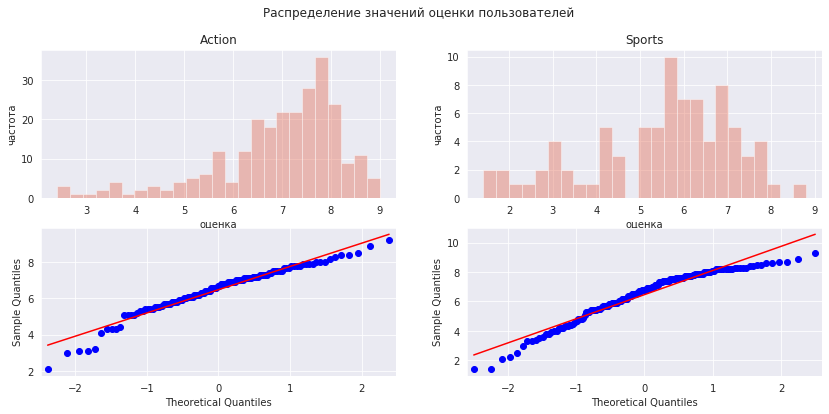

In [67]:
# Визуальная оценка распределения признаков в выборках
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
fig.suptitle('Распределение значений оценки пользователей')
sns.set_palette("rocket_r", 2, .85  ,color_codes=True)
sns.distplot(action_user_score, ax=axes[0,0], kde=False, bins=25)
axes[0,0].set_title('Action')
axes[0,0].set_xlabel('оценка')
axes[0,0].set_ylabel('частота')
sns.distplot(sports_user_score, ax=axes[0,1], kde=False, bins=25)
axes[0,1].set_title('Sports')
axes[0,1].set_xlabel('оценка')
axes[0,1].set_ylabel('частота')
qqplot(xone_user_score, line='s', ax=axes[1,0])
qqplot(pc_user_score, line='s', ax=axes[1,1])
plt.show()

In [68]:
# Расчет дисперсий
print('Дисперсия выборки отзывов для XOne:', action_user_score.var(ddof=1))
print('Дисперсия выборки отзывов для PC:', sports_user_score.var(ddof=1))

Дисперсия выборки отзывов для XOne: 1.7098182149805448
Дисперсия выборки отзывов для PC: 2.8979503729202523


Визуально дисперсии не равны, но можно применить критерий Левена для статистической оценки равенства дисперсий

<br>**$Ho$**  - ***дисперсии в выборках пользовательских рейтингов жанров Action и Sports одинаковые***
<br>**$H1$**  - ***дисперсиив в выборках пользовательскиих рейтингов жанров Action и Sports различаются***

In [69]:
# Тест Левене
alpha=0.05
results2 =levene(action_user_score, sports_user_score)
print('p-value:', results2.pvalue)

if (results2.pvalue < alpha):
    print("Необходимо отвергнуть нулевую гипотезу")
else:
    print("Не нужно отвергать нулевую гипотезу")

p-value: 0.004995921727292458
Необходимо отвергнуть нулевую гипотезу


Тест Левне снова говорит о статистической разности дисперсий, поэтому снова можно применить t-тест для невзависимых выборок с разными дисперсиями, с основными гипотезами:
<br>**$Ho$**  - ***cредние пользовательские рейтинги жанров Action и Sports одинаковы***
<br>**$H1$**  - ***cредние пользовательские рейтинги жанров Action и Sports различаются***

In [70]:
# Проведение t теста для выборок с разной дисперсией
alpha=0.05
results1 = st.ttest_ind(action_user_score, sports_user_score, equal_var=False) 
print('p-value:', results1.pvalue)

if (results1.pvalue < alpha):
    print("Необходимо отвергнуть нулевую гипотезу")
else:
    print("Не нужно отвергать нулевую гипотезу")

p-value: 1.1293305716249996e-10
Необходимо отвергнуть нулевую гипотезу


t-Тест показал что имеется сильные статистически значемые различия средних что позволяет отвергнуть нулевую гипотезу. Однако т.к. выборка по жанру Sports всего 84 наблюдения а из графиков видны хвосты, возможно применить снова тест Манна-Уитни, гипотеза для которого будет звучать так:
<br>**𝐻𝑜**  - ***уровни признаков в выборках пользовательских рейтингов жанров Action и Sports одинаковые***
<br>**𝐻1**  - ***уровни признаков в выборках пользовательскиих рейтингов жанров Action и Sports различаются***

In [71]:
# Тест Манна-Уитни
alpha=0.05
results3 = mannwhitneyu(action_user_score, sports_user_score, alternative='two-sided')
print('p-value:', results3.pvalue)

if (results3.pvalue < alpha):
    print("Необходимо отвергнуть нулевую гипотезу")
else:
    print("Не нужно отвергать нулевую гипотезу")

p-value: 1.9847116764991923e-13
Необходимо отвергнуть нулевую гипотезу


Тест Манна Уитни показыват что имеется статистическая значимость того что распределения признака **различается.**

In [72]:
# Расчет средних значений очищенного от 0 значений датафрейма
stat_genre = actual_data.query('(genre == "Action" or genre == "Sports") and user_score != 0')
av_stat_genre = stat_genre.groupby('genre')['user_score'].agg(mean='mean', median='median')
av_stat_genre.reset_index().style.background_gradient(cmap=cm)

,genre,mean,median
0,Action,6.93619,7.3
1,Sports,5.49881,5.75


Визуальные наблюдения значений подтвержденные статистическим тестами позволяют сделать вывод о том что вероятность равенства средних значений оценок пользователей жанров Асtion и Sports нитожно мала.

<br>**Результат проверки гипотез показал:**

<br>**Оснований отвергнуть гипотезу о равенстве средних значений оценок пользователей платформ XOne и PC нет.**
<br>**Есть статистически значимые различия между средними значениями оценок пользователей жанров Action и Sports.**

<br>При проверки гипотез анализировалось визуальное распределение значений, количество наблюдений в выборках, были произведены проверки равенств дисперсий критерием Левена, для принятия решения об использования t критерия для независимых выборок с разными дисперсиями. Поскльку предпосылку о нормальном распределении исходя из графиков можно принять условно и количество наблюдений в выборках не очень велико, дополнительно использовался тест Манна-Уитни, для подтверждения результатов после проверки t критерием.

**Общий вывод:**

<br>Исторически "золотой век"(до 1400 релизов в год) как для мобильных так и для стационарных игровых платформ, если судить по количеству релизов закончился в 2010 году, можно предположить что появление и развитие смартфонов сыграло определяющую роль. После падения, количество релизов стабилизировалось с 2012 года около уровня 600 релизов, в настоящем рынок игр для игровых платформ - отдельная ниша. В среднем платформы существуют около 8 лет, после чего либо исчезают с рынка либо заменяются следующим поколением. Так, актуальный период для оценки рынка и перспектив в динамике - 4 года. За последние годы можно назвать нишевых лидеров - Sony и Microsoft, чьи платформы последнего поколения **Sony Playstation 4 и Microdoft XOne** в топе по штучным продажам игр *(244 и 133 млн шт. соответственно)*, причем с 2014 года уверенно лидирует PS4. 3DS хотя формально вторая (179 млн.шт) но уже не в активной фазе. Между продажами и пользовательскими оценками нет взаимосвязи, связь с оценками критиков присутствует умеренная, это справедливо для лидеров, для остальных такие оценки имеюь слабую взаимосвязь.

<br>Рекомендации для ассортиментной матрицы магазина компьютерных игр в 2017 году можно обозначить следующим образом:

<br>Для рынка **Северной Америки**, самая перспективная платформа **PS4**, затем **XOne** *(доля рынка - 31% и 28%)*, должны быть широко представлены самые популярные жанры для этого рынка - **Action** и **Shooter** *(доля рынка 27% и 22%)*, далее по убыванию - RPG, Sports, Platform, в основном , более чем в половине случаев с рейтингами M и T, четверть - с подростковыми рейтингами.

<br>Для рынка **Европы**, большую часть ассортимента должны составлять игры для **PS4** и **XOne** *(доля рынка 28% и 20%)* и и WiiU и остальные - в равных долях, самые популярны жанры - аналогично ассортименту для Северной Америки, рекомендации по рейтингам - также аналогично американским. 

<br>Для рынка **Японии**, по крайней мере на ближайший год все еще актуальны игры для мобильной приставки от **Nintendo 3DS** *(доля рынка 66%)*, из-за хоть и имеющей тенденцию к снижению, но все еще большой популярности, однако игры для современныех **PS4** *(9%)* и WiiU*(10%)* должны быть представлены, Основной перспективный жанр - **RPG** *(доля рынка 37%)*, затем **Action** *(23%)*, далее смешанные жанры, Simulation и Platform - в  равных пропорциях. Самый частотный рейтинг - "для всех", возможно необходимы рейтинги от национальной ассоциации.

<br>Общей рекомендацией для всех рынков может являтся наличие в ассортименте игр с хорошими оценками критиков, для самых перспективных платформ, возможно - рейтинги для цифровых продаж от онлайн ассоциаций. Также можно учесть что игры для PC - небольшая по объему но стабильная ниша, многие игры для XOne выходят также для PC, в силу доминирования на рынке PC софта Microsoft. C большой вероятностью средние пользовательские отзывы для для этих платформ одинаковы, что может давать синергию в продажах и варьиативность ассортимента. Также с небходимо отметить что пользователи более охотно даюь хорошие оценки самому популярному жанру Action чем например жанру Sports. В целом для жанра Action необходима широта ассортимента, для Shooter - наличие популярных бестселлеров.